# 과적합 피하기 - 초음파 광물 데이터

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [88]:
from google.colab import files
up = files.upload()

Saving sonar.csv to sonar (2).csv


In [89]:
df = pd.read_csv('sonar.csv', header= None)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R


In [90]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [91]:
# X data: scaling
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(df.iloc[:,:-1].values)

In [92]:
# Y data: label encoding
from sklearn.preprocessing import LabelEncoder
y_labeled = LabelEncoder().fit_transform(df[60].values)

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_labeled, stratify = y_labeled, test_size=0.2, random_state=seed)

 - 모델 정의, 설정, 학습, 평가

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

 - case1) 은닉층 2개

In [95]:
mod1 = Sequential([Dense(80, input_dim=60, activation='relu'),
                   Dense(12, activation='relu'),
                   Dense(1,activation='sigmoid')])
mod1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 80)                4880      
                                                                 
 dense_71 (Dense)            (None, 12)                972       
                                                                 
 dense_72 (Dense)            (None, 1)                 13        
                                                                 
Total params: 5,865
Trainable params: 5,865
Non-trainable params: 0
_________________________________________________________________


In [96]:
params1 = 5865

In [97]:
mod1.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
hist1 = mod1.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=100, verbose=0)

In [98]:
mod1.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.3303 - accuracy: 0.9048


[0.33029451966285706, 0.9047619104385376]

In [99]:
params1, acc1 = 5865, 0.9048

 - case2) 은닉층 4개

In [100]:
mod2 = Sequential([Dense(80, input_dim=60, activation='relu'),
                   Dense(48, activation='relu'),
                   Dense(20, activation='relu'),
                   Dense(8, activation='relu'),
                   Dense(1,activation='sigmoid')])
mod2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_73 (Dense)            (None, 80)                4880      
                                                                 
 dense_74 (Dense)            (None, 48)                3888      
                                                                 
 dense_75 (Dense)            (None, 20)                980       
                                                                 
 dense_76 (Dense)            (None, 8)                 168       
                                                                 
 dense_77 (Dense)            (None, 1)                 9         
                                                                 
Total params: 9,925
Trainable params: 9,925
Non-trainable params: 0
_________________________________________________________________


In [101]:
mod2.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
hist2 = mod2.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=100, verbose=0)

In [102]:
mod2.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.4749 - accuracy: 0.8571


[0.4749058187007904, 0.8571428656578064]

In [103]:
params2, acc2 = 9925, 0.8333

 -case3) 은닉층 6개

In [104]:
mod3 = Sequential([Dense(80, input_dim=60, activation='relu'),
                   Dense(64, activation='relu'),
                   Dense(40, activation='relu'),
                   Dense(24, activation='relu'),
                   Dense(10, activation='relu'),
                   Dense(4, activation='relu'),
                   Dense(1,activation='sigmoid')])
mod3.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 80)                4880      
                                                                 
 dense_79 (Dense)            (None, 64)                5184      
                                                                 
 dense_80 (Dense)            (None, 40)                2600      
                                                                 
 dense_81 (Dense)            (None, 24)                984       
                                                                 
 dense_82 (Dense)            (None, 10)                250       
                                                                 
 dense_83 (Dense)            (None, 4)                 44        
                                                                 
 dense_84 (Dense)            (None, 1)               

In [105]:
mod3.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
hist3 = mod3.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=100, verbose=0)

In [106]:
mod3.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.7921 - accuracy: 0.8571


[0.7921215295791626, 0.8571428656578064]

In [107]:
params3, acc3 = 13947, 0.8571

 - case4) 은닉층 8개

In [108]:
mod4 = Sequential([Dense(80, input_dim=60, activation='relu'),
                   Dense(64, activation='relu'),
                   Dense(48, activation='relu'),
                   Dense(36, activation='relu'),
                   Dense(28, activation='relu'),
                   Dense(16, activation='relu'),
                   Dense(10, activation='relu'),
                   Dense(4, activation='relu'),
                   Dense(1,activation='sigmoid')])
mod4.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_85 (Dense)            (None, 80)                4880      
                                                                 
 dense_86 (Dense)            (None, 64)                5184      
                                                                 
 dense_87 (Dense)            (None, 48)                3120      
                                                                 
 dense_88 (Dense)            (None, 36)                1764      
                                                                 
 dense_89 (Dense)            (None, 28)                1036      
                                                                 
 dense_90 (Dense)            (None, 16)                464       
                                                                 
 dense_91 (Dense)            (None, 10)              

In [109]:
mod4.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
hist4 = mod4.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=100, verbose=0)
mod4.evaluate(X_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.7051 - accuracy: 0.8571


[0.7051125764846802, 0.8571428656578064]

In [110]:
params4, acc4 = 16667, 0.8571

 - 학습과정 시각화

In [111]:
y_acc1 = hist1.history['accuracy']
y_acc2 = hist2.history['accuracy']
y_acc3 = hist3.history['accuracy']
y_acc4 = hist4.history['accuracy']
y_vloss1 = hist1.history['val_loss']
y_vloss2 = hist2.history['val_loss']
y_vloss3 = hist3.history['val_loss']
y_vloss4 = hist4.history['val_loss']
xs = np.arange(1, len(y_acc1)+1)

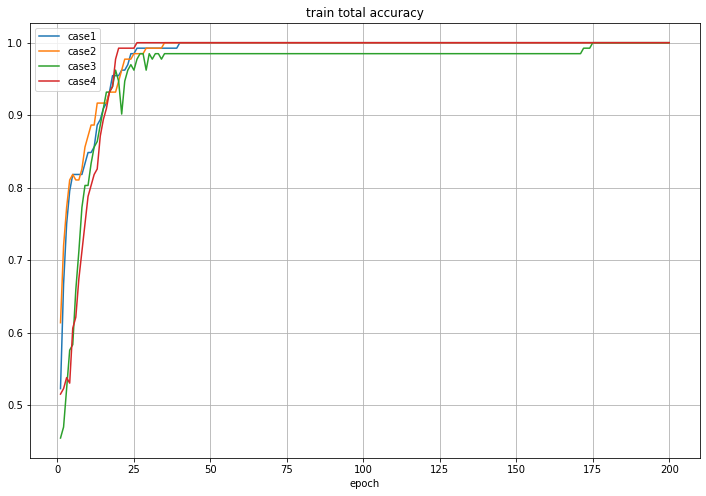

In [112]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc1, label='case1')
plt.plot(xs, y_acc2, label='case2')
plt.plot(xs, y_acc3, label='case3')
plt.plot(xs,y_acc4, label='case4')
plt.legend(), plt.grid()
plt.xlabel('epoch'), plt.title('train total accuracy')
plt.show()

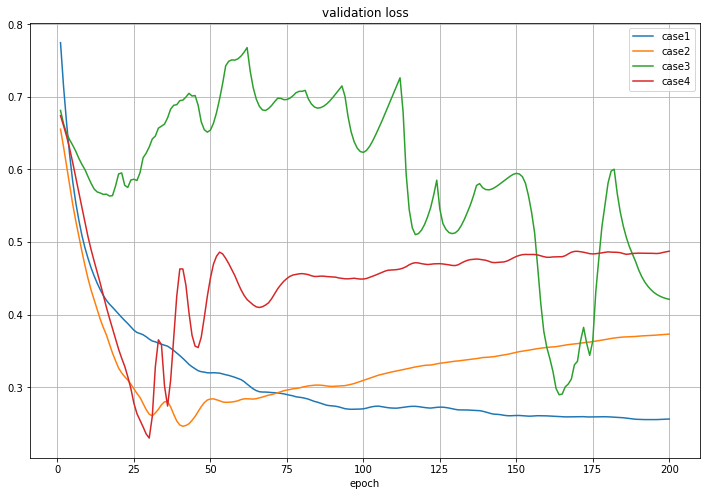

In [113]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_vloss1, label='case1')
plt.plot(xs, y_vloss2, label='case2')
plt.plot(xs, y_vloss3, label='case3')
plt.plot(xs,y_vloss4, label='case4')
plt.legend(), plt.grid()
plt.xlabel('epoch'), plt.title('validation loss')
plt.show()

 - 베스트 모델만 저장하는 콜백


In [114]:
model = Sequential([Dense(80, input_dim=60, activation='relu'),
                   Dense(48, activation='relu'),
                   Dense(20, activation='relu'),
                   Dense(8, activation='relu'),
                   Dense(1,activation='sigmoid')])
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_94 (Dense)            (None, 80)                4880      
                                                                 
 dense_95 (Dense)            (None, 48)                3888      
                                                                 
 dense_96 (Dense)            (None, 20)                980       
                                                                 
 dense_97 (Dense)            (None, 8)                 168       
                                                                 
 dense_98 (Dense)            (None, 1)                 9         
                                                                 
Total params: 9,925
Trainable params: 9,925
Non-trainable params: 0
_________________________________________________________________


In [115]:
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

In [116]:
from tensorflow.keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('sonar_best.h5', monitor='val_loss', verbose=0, save_best_only=True)

In [117]:
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=100, verbose=0, callbacks=[mc])

In [118]:
from tensorflow.keras.models import load_model
best_model = load_model('sonar_best.h5')
best_model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.4052 - accuracy: 0.7381


[0.4051837921142578, 0.738095223903656]

In [119]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs=np.arange(1,len(y_acc)+1)

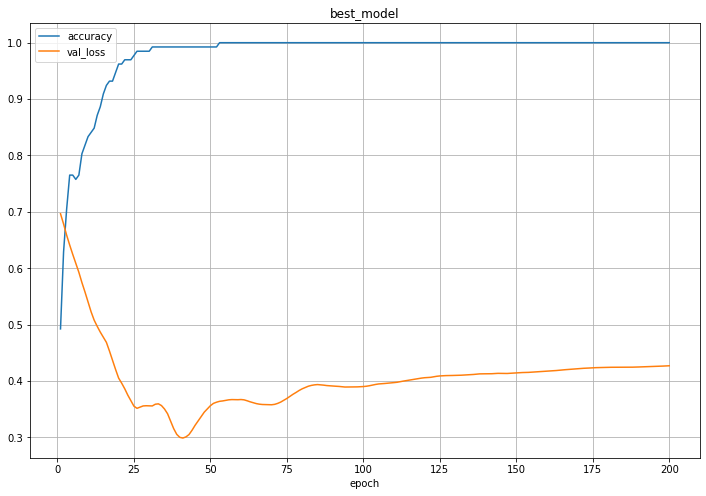

In [120]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='accuracy')
plt.plot(xs, y_vloss, label='val_loss')
plt.legend(), plt.grid()
plt.xlabel('epoch'), plt.title('best_model')
plt.show()

 - 조기 종료 콜백함수

In [121]:
model1 = Sequential([Dense(80, input_dim=60, activation='relu'),
                   Dense(48, activation='relu'),
                   Dense(20, activation='relu'),
                   Dense(8, activation='relu'),
                   Dense(1,activation='sigmoid')])
model1.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_99 (Dense)            (None, 80)                4880      
                                                                 
 dense_100 (Dense)           (None, 48)                3888      
                                                                 
 dense_101 (Dense)           (None, 20)                980       
                                                                 
 dense_102 (Dense)           (None, 8)                 168       
                                                                 
 dense_103 (Dense)           (None, 1)                 9         
                                                                 
Total params: 9,925
Trainable params: 9,925
Non-trainable params: 0
_________________________________________________________________


In [122]:
model1.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

In [123]:
from tensorflow.keras.callbacks import EarlyStopping
mc = ModelCheckpoint('sonar_best.h5', monitor='val_loss', verbose=0, save_best_only=True)
es = EarlyStopping(patience=20)

In [124]:
# epoch가 종료될 때마다 콜백 함수 실행되도록 설정
hist01 = model1.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=100, verbose=1, callbacks=[mc, es])

Epoch 1/200
2/2 [==============================] - 1s 193ms/step - loss: 0.6930 - accuracy: 0.5076 - val_loss: 0.6043 - val_accuracy: 0.7647
Epoch 2/200
2/2 [==============================] - 0s 53ms/step - loss: 0.6284 - accuracy: 0.6061 - val_loss: 0.5756 - val_accuracy: 0.7941
Epoch 3/200
2/2 [==============================] - 0s 61ms/step - loss: 0.5826 - accuracy: 0.7121 - val_loss: 0.5507 - val_accuracy: 0.7647
Epoch 4/200
2/2 [==============================] - 0s 57ms/step - loss: 0.5439 - accuracy: 0.7955 - val_loss: 0.5267 - val_accuracy: 0.7647
Epoch 5/200
2/2 [==============================] - 0s 53ms/step - loss: 0.5073 - accuracy: 0.8182 - val_loss: 0.5063 - val_accuracy: 0.7647
Epoch 6/200
2/2 [==============================] - 0s 53ms/step - loss: 0.4727 - accuracy: 0.8409 - val_loss: 0.4882 - val_accuracy: 0.7647
Epoch 7/200
2/2 [==============================] - 0s 52ms/step - loss: 0.4381 - accuracy: 0.8561 - val_loss: 0.4677 - val_accuracy: 0.7647
Epoch 8/200
2/2 [==

In [125]:
best_model = load_model('sonar_best.h5')
best_model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.5825 - accuracy: 0.7143


[0.5824726819992065, 0.7142857313156128]